# Support Vector Machine

Support Vector Machine or SVM is a supervised machine learning algorithm which is generally used for classification tasks. The idea was presented by Vladimir N. Vapnik and Alexey Ya. Chervonenkis in 1963 assuming that the data points are linearly separable. Later, Vladimir N. Vapnik extended this initial idea and introduced something called as “kernel trick” to enable non-linear classifications too.

A **linear SVM classifier** assumes that the vectors are linearly separable, meaning we can draw a linear decision boundary to represent our classifier. In an n-dimensional space, this boundary is called a **hyperplane**. In 2-D, it is a line; in 3-D, a plane; and in higher dimensions, a hyperplane. The key idea is that the decision boundary is linear and divides the space so that all examples of class C1 lie on one side and all examples of class C2 lie on the other. Our goal is to find a hyperplane that separates positive training examples (C1) from negative ones (C2). We aim to learn the equation of this hyperplane, which represents our hypothesis. In machine learning, we hypothesize about the function linking input to output and proceed accordingly.

![image.png](02_Support_Vector_Machine_attachments/2nV9HpQxSD_image.png)

Here is an example of a 2-D space where the hyperplane is a line. `m` is the slope of the line and `b` is a constant. The slope (coefficient of x or parameters or weights) generally gives an idea of the orientation of the line with respect to x-axis and b represents the bias. Bias is a constant value that represents nothing but the position of the line from origin.

##### The hyperplane is the classifier
and can be represented as $y = mx + b$ or in a more standard notation as

$$
w \cdot X + b = 0
$$

The above equation is the decision boundary (Hyperplane) where the function $f(x)$ equals zero. This is the actual hyperplane that seperates the two classes. Below is how the decision function $f(x)$ can be represented and is used to classify points and determine on which side of hyperplane a point lies

$$
f(x) = w^T \cdot X + b
$$

where 
- $w$ is an n-dimensional column vector representing weights
- $X$ is also an n-dimensional column vector representing features
- $w^T.X$ is the dot product of weight vector and feature vector. The trasnpose will make the weight column vector into row vector to product of scalar value for dot product.


### The Hyperplane Examples

In a 2D space, a line $x - 2y + 3 = 0$ as a hyperplan can be represented with $W = [1, -2]$, $X = [x, y]$ and bias $b = 3$. Also note that the coefficient $1$ is associated with feature $x$ and coefficient $-2$ is associated with feature $y$. $3$ is the bias term (intercept).

> **Hyperplane in 2D** \
![image.png](02_Support_Vector_Machine_attachments/H6Ed5iD6SD_image.png)

Similarly for a plan in 3d space say 2x + 3y + 4z + 3 = 0, the $W = [2, 3, 4]$, $X = [x, y, z]$ and bias, $b= 3$. The vector $[2, 3, 4]$ will always be normal to the plane $2x + 3y + 4z + 3 = 0$

> **Hyperplane in 3D** \
![image-2.png](02_Support_Vector_Machine_attachments/jg9oh3buHU_image-2.png)


## Classification: Learning via Decision function

We understand that Hyperplane $w.X + b = 0$ divides the n-dimentional space into 2 half, and decision function $f(x) = w^T.X + b$ is used to classify data points and determine on which side of hyperplane it lies.

- if $f(x)$ > 0, the point x is classified as belonging to the positive class (C1)
- if $f(x)$ < 0, the point x is classified as belonging to the negative class (C2)
- if $f(x)$ = 0, the point x lies exactly on the hyperplane

![image.png](02_Support_Vector_Machine_attachments/dl2THCDEVk_image.png)

SVM aims to identify a hyper-plane or line that equally distances the nearest vectors from both classes, known as "Support Vectors"—hence the algorithm's name. The hyper-plane maintains a distance 'd' from the support vectors of each class. SVM uses only these support vectors to form the decision boundary, making it resilient to outliers since vectors far from the support vectors don't influence the boundary. The goal is to maximize this margin 'd' to establish the decision boundary equidistant from the support vectors on both sides.


### Constraint
In SVM learning, we want the margin or distance (d) between the hyper-plane and support vectors to be as large as possible. WHY? Just try to think what we are trying to achieve here and how will ‘having maximum margin/distance’ help in that. So, more the distance, better the classifier is. We don’t want any of the example to fall in the gutter (the space between hyper-planes that pass through support vectors). We need to respect this condition when we try to maximize the margin mathematically. This condition, is referred to as a “constraint”.

So, given a dataset of $n$ points of the form $(X, y)$ where $X$ is a feature vector and $y \in \{-1, 1\}$ is the class label, the SVM finds the hyperplane that separates the classes with the maximum margin. This hyperplane can be described by the equation:

$$
\mathbf{w} \cdot X + b = 0
$$

The objective is to minimize $\|\mathbf{w}\|$ by maximizing the  margin between the two classes seperated by the hyperplane defined by $\mathbf{w} \cdot X + b = 0$. The constraint $y_i(\mathbf{w} \cdot X + b) \geq 1$ for all $i$ ensures that all data points $x_i$ are correctly classified with a margin at least 1, where $y$ are the class labels $(-1) or (1)$. 



### One Vs Rest SVM Problem

> Bob thinks it is clearly not a regression problem, but a classification problem. He thinks that we can change it into a binary classification and use the support vector machine we learned in Lecture 4 to solve the problem. In order to do so, he suggests that we can build an one vs. rest model for every digit. For example, classifying the digits into two classes: 0 and not 0.

> Bob wrote a function run_svm_one_vs_rest_on_MNIST where he changed the labels of digits 1-9 to 1 and keeps the label 0 for digit 0. He also found that sklearn package contains an SVM model that you can use directly. He gave you the link to this model and hopes you can tell him how to use that.


The "one-vs-rest" (OvR) strategy, used in the context of SVM (Support Vector Machine) for multi-class classification, involves training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. This approach transforms a multi-class classification problem into multiple binary classification problems.

In case of Bob's example (below function), he is first trying with 2 classes i.e. 0 (class C1) Vs 1-9 (class C2)

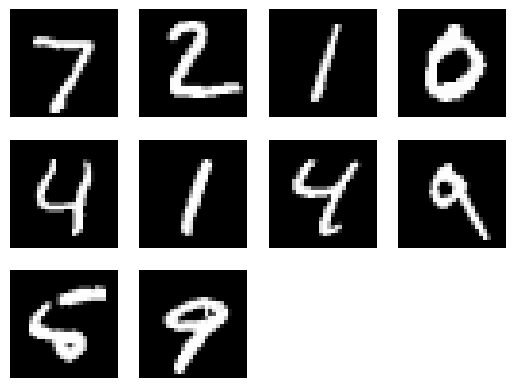

First 10 prediction: [1 1 1 0 1 1 1 1 1 1]
SVM one vs. rest test_error: 0.007499999999999951
The model incorrectly classified 0.75% of the test data.


In [7]:
import mnist.utils as U
from sklearn.svm import LinearSVC
import numpy as np


def run_svm_one_vs_rest_on_MNIST(dataset='mnist/Datasets/mnist.pkl.gz'):
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = U.get_MNIST_data(dataset)
    train_y[train_y != 0] = 1
    test_y[test_y != 0] = 1
    pred_test_y = one_vs_rest_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error

def compute_test_error_svm(test_y, pred_test_y):
    return 1 - np.mean(pred_test_y == test_y)

def one_vs_rest_svm(train_x, train_y, test_x):
    """
    Trains a linear SVM for binary classifciation

    Args:
        train_x - (n, d) NumPy array (n datapoints each with d features)
        train_y - (n, ) NumPy array containing the labels (0 or 1) for each training data point
        test_x - (m, d) NumPy array (m datapoints each with d features)
    Returns:
        pred_test_y - (m,) NumPy array containing the labels (0 or 1) for each test data point
    """
    # Train the SVM model
    clf = LinearSVC(C=0.1, random_state=0)
    clf.fit(train_x, train_y)
    pred_test_y = clf.predict(test_x)
    
    U.plot_images(test_x[0:10, :])
    print(f"First 10 prediction: {pred_test_y[0:10]}")

    return pred_test_y


test_error = run_svm_one_vs_rest_on_MNIST()
print('SVM one vs. rest test_error:', test_error)
print(f"The model incorrectly classified {test_error * 100:.2f}% of the test data.")

The regularization parameter in SVM, often denoted as (C), plays a crucial role in controlling the trade-off between achieving a low training error and maintaining a low model complexity to avoid overfitting. Here's how the regularization parameter impacts the SVM model:

- High (C) values: A high (C) value gives more importance to minimizing the training error, which means the SVM model will try to classify all training examples correctly, even if it has to make the decision boundary more complex. This can lead to a model that fits the training data very well but may not generalize well to unseen data (overfitting).
Low (C) values:

- A low (C) value prioritizes simplicity of the decision boundary, even if it means allowing more misclassifications on the training data. This can lead to a model with higher bias but lower variance, potentially improving its generalization to new, unseen data (underfitting if (C) is too low).

### Multi Class SVM using oneVsRest strategy

For a dataset with (N) classes, (N) separate SVMs are trained. Each SVM decides whether an instance belongs to one of the classes or to the rest of the classes. When classifying a new instance, all (N) classifiers are evaluated, and the classifier that predicts the instance with the highest confidence classifies the instance. 

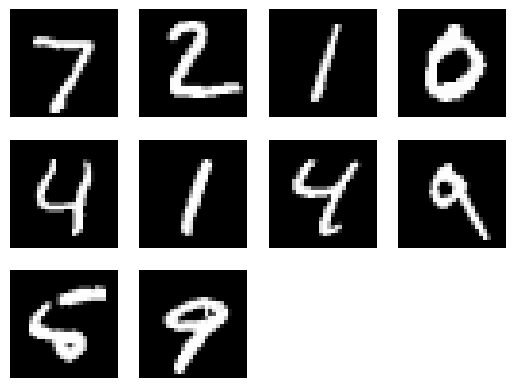

First 10 prediction: [7 2 1 0 4 1 4 9 6 9]
Multiclass SVM test_error: 0.08199999999999996
The model incorrectly classified 8.20% of the test data.


In [23]:
import mnist.utils as U
from sklearn.svm import LinearSVC
import numpy as np

def multi_class_svm(train_x, train_y, test_x):
    """
    Trains a linear SVM for multiclass classifciation using a one-vs-rest strategy

    Args:
        train_x - (n, d) NumPy array (n datapoints each with d features)
        train_y - (n, ) NumPy array containing the labels (int) for each training data point
        test_x - (m, d) NumPy array (m datapoints each with d features)
    Returns:
        pred_test_y - (m,) NumPy array containing the labels (int) for each test data point
    """
    # Train the SVM model
    clf = LinearSVC(C=0.1, random_state=0)
    clf.fit(train_x, train_y)
    pred_test_y = clf.predict(test_x)

    U.plot_images(test_x[0:10, :])
    print(f"First 10 prediction: {pred_test_y[0:10]}")

    return pred_test_y

def run_multiclass_svm_on_MNIST(dataset='mnist/Datasets/mnist.pkl.gz'):
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = U.get_MNIST_data(dataset)
    pred_test_y = multi_class_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error


test_error = run_multiclass_svm_on_MNIST()
print('Multiclass SVM test_error:', test_error)
print(f"The model incorrectly classified {test_error * 100:.2f}% of the test data.")